# Manejo de word-embeddings con Gensim

[Gensim](https://radimrehurek.com/gensim/intro.html#what-is-gensim) es una biblioteca gratuita de Python de código abierto para representar documentos como vectores semánticos. 

Entre otras cosas incluye los algoritmos de Word2Vec y FastText, y funcionalidades para manejar las word-embeddings resultantes.

Nosotros vamos a utilizarlo para cargar la matriz [word-embedding generada por Glove](https://nlp.stanford.edu/data/glove.6B.zip) que se descarga de [la web del proyecto](https://nlp.stanford.edu/projects/glove/). 

Del archivo comprimido que nos descargamos tomaremos solamente el fichero más pequeño con el espacio vectorial de 50 dimensiones `glove.6B.50d.txt`.

# Carga del fichero
Antes de cargar el fichero de textocon la word-embedding de Glove es necesario traducir el fichero al formato word2vec, que reconoce Gensim, que en realidad es prácticamente idéntico al que ya tenemos.

Dado que los vectores de palabras (las word-embeddings) son independientes del algoritmo que se usó para obtenerlos (Word2Vec, FastText, VarEmbed, etc.), pueden representarse mediante una estructura independiente. En concreto Gensim los implementa a través de una estructura que se llama `KeyedVectors` y que es esencialmente un mapeo clave-valor entre cada palabra y su vector correspondiente [con otras funcionalidades adicionales](https://radimrehurek.com/gensim/models/keyedvectors.html). 

In [1]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# Traducimos el fichero glove a un fichero con formato word2vec
glove_file = 'glove.6B.50d.txt'
#glove_file = '/content/drive/MyDrive/Asignaturas/IA/IA2_21-22/Material/PLN/tmp/practica/Parte 1/glove.6B.50d.txt'

# Gensim 3 requiere hacerlo en varios pasos
#word2vec_file = 'glove.6B.50d.txt.word2vec'
#glove2word2vec(glove_file, word2vec_file)
#model = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)

# Gensim 4 puede transformar de glove a word2vec directamente
model = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

C:\software\programacion\python\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Manipulación básica del word-embedding

La clase `KeyedVectors` nos permite hacer muchas casos. 

Lo que hace principalmente es mapear cada palabra con su vector correspondiente (de string a array 1D numpy).


In [2]:
# El uso básico sería darle una palabra y que nos devuelva su vector correspondiente
model['monkey']

array([ 0.28704  , -0.60904  , -0.74821  ,  0.17686  ,  0.92118  ,
        0.36994  ,  0.10464  , -1.0945   ,  0.45246  ,  0.75508  ,
        0.041291 ,  0.61758  ,  0.82508  ,  0.7044   ,  0.12365  ,
       -0.081073 , -0.060157 ,  0.90245  , -1.2025   ,  0.04606  ,
       -0.57476  , -0.15483  ,  0.45276  , -0.087841 ,  0.49575  ,
       -1.0462   , -0.59215  ,  0.40345  , -0.11113  , -1.3799   ,
        0.97611  , -0.312    , -0.75014  ,  0.44309  , -0.0056967,
        0.44116  ,  0.073432 , -0.76681  ,  0.12938  , -0.54472  ,
       -0.74424  ,  0.19052  , -0.80318  ,  0.54953  ,  1.1741   ,
        0.37876  ,  0.93837  , -1.0941   ,  0.2474   , -0.69492  ],
      dtype=float32)

## Encontrando palabras similares a otras
Experimentar y ser inquisitivo con los datos siempre es una buena manera de tomar contacto con ellos para empezar a entenderlos.

En este caso, podemos jugar a encontrar palabras similares en el espacio de 50 dimensiones de la word-embedding. Esto nos hará entender mejor la similitud "semántica" que de facto ha quedado reflejada.

Con `most_similar` se nos devolverán las palabras más similares de acuerdo a la similitud del coseno.

In [3]:
x = model.most_similar(positive=['red'], topn=5)
print(x)

[('yellow', 0.8995459079742432), ('blue', 0.8901659250259399), ('green', 0.8561933040618896), ('black', 0.8400583863258362), ('purple', 0.8323202133178711)]


In [4]:
# Al buscar un término similar a "pencil" encontramos otros objetos de papelería básicos, pero también sus plurales
x = model.most_similar(positive=['pencil'], topn=5)
print(x)

[('scissors', 0.7837907671928406), ('sharpener', 0.7752447128295898), ('pencils', 0.7656055688858032), ('crayon', 0.738135039806366), ('sharpeners', 0.7206112146377563)]


In [5]:
# Al buscar un término similar a "madrid" encontramos ciudades españolas pero también europeas, 
# e incluso la palabra "atlético" asociada por el equipo de fútbol
x = model.most_similar(positive=['madrid'], topn=5)
print(x)

[('milan', 0.8963416218757629), ('barcelona', 0.8910947442054749), ('valencia', 0.8619170188903809), ('sevilla', 0.786338746547699), ('atletico', 0.783437192440033)]


In [6]:
# Podemos encontrar también nombres propios de personas célebres que están asociadas a 
# personas con las que tienen una relación, en este caso por tener similar cargo y ser
# más o menos coetáneos
x = model.most_similar(positive=['merkel'], topn=5)
print(x)

[('schroeder', 0.927523136138916), ('sarkozy', 0.8771122097969055), ('kohl', 0.8661774396896362), ('steinmeier', 0.8580197095870972), ('chirac', 0.8508473038673401)]


In [7]:
# Podemos buscar personajes históricos que en este caso, están asociados a hechos célebres, 
# años significativos, etc
x = model.most_similar(positive=['napoleon'], topn=5)
print(x)

[('bonaparte', 0.8680719137191772), ('barbarossa', 0.7559982538223267), ('1812', 0.7390989065170288), ('xiv', 0.7368819117546082), ('1806', 0.7310059666633606)]


In [8]:
# Vamos a ver cómo podemos poner cifras que, en este caso, correlan con años próximos
# O años relacionados (1492 fue la llegada de Colón a América y 1521 la conquista de 
# Tenochtitlan por Hernán Cortés)
x = model.most_similar(positive=['1492'], topn=5)
print(x)

[('1493', 0.8237272500991821), ('1494', 0.7913431525230408), ('1521', 0.7847018837928772), ('1519', 0.7624526619911194), ('1502', 0.7540624141693115)]


In [9]:
# Podemos ver también que existen las palabras con sufijos 
# Y que además sus vecinas pueden dar lugar a resultados algo sorprendentes
x = model.most_similar(positive=['biggest'], topn=5)
print(x)

[('largest', 0.8566276431083679), ('huge', 0.8019895553588867), ('major', 0.7904885411262512), ('big', 0.7904651761054993), ('industry', 0.7844395041465759)]


In [10]:
# En este caso, vemos un sesgo muy fuerte de una palabra polisémica hacia un único significado
# El sesgo de "party" hacia la política, se debe al entrenamiento con
# textos de wikipedia, pero llama la atención que no esté ninguna palabra asociada con el
# sentido de "fiesta"
x = model.most_similar(positive=['party'], topn=10)
print(x)

[('democratic', 0.8763022422790527), ('opposition', 0.875884473323822), ('parties', 0.8393407464027405), ('coalition', 0.830763041973114), ('leader', 0.8286206126213074), ('election', 0.8271850347518921), ('candidate', 0.8257304430007935), ('elections', 0.8204044699668884), ('socialist', 0.8168104887008667), ('liberal', 0.811489462852478)]


## Experimentando con analogías
A continuación vamos a jugar con las analogías para seguir profundizando en la similitud semántica que refleja nuestro word-embedding.

Recordamos:
> "man is to king as woman is to X"

Se modela como: 
>       man - king ~ woman - x   
>       x ~ king + woman - man 

Para ello volvemos a usar `most_similar` y le facilitamos en `positive` las palabras que tienen signo positivo y en `negative` las de negativo. El calculará una media de los vectores de las palabras facilitadas (usando para las palabras negativas el vector de signo contrario), y buscará la palabra más similar al vector medio según la similitud del coseno.


In [11]:
x = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(x)



[('queen', 0.8523604273796082)]


In [12]:
# Vamos a probar con otra analogía y observar su sesgo
x = model.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=1)
print(x)

[('nurse', 0.8404642939567566)]


In [13]:
# Podemos pensar en analogías geográficas
x = model.most_similar(positive=['madrid', 'france'], negative=['spain'], topn=1)
print(x)
x = model.most_similar(positive=['barcelona', 'france'], negative=['spain'], topn=1)
print(x)

[('paris', 0.8246473670005798)]
[('lyon', 0.8399261236190796)]


In [14]:
# Culinarias
x = model.most_similar(positive=['paella', 'italy'], negative=['spain'], topn=1)
print(x)

[('lasagna', 0.7175830602645874)]


In [15]:
# De transportes
x = model.most_similar(positive=['plane', 'space'], negative=['air'], topn=1)
print(x)

[('spaceship', 0.7625472545623779)]


In [16]:
# O de cualquier cosa que se nos ocurra y ver qué sale
x = model.most_similar(positive=['batman', 'superman'], negative=['robin'], topn=1)
print(x)

[('superboy', 0.7647712230682373)]


# Visualización de una word-embedding

Como ya sabemos, nuestras herramientas de visualización para mostrar datos funcionan con 2 (o a lo sumo 3) dimensiones. En este caso, al tener un espacio con 50 dimensiones, necesitamos hacer uso de técnicas matemáticas para reducir la dimensionalidad y mostrar las palabras en 2 o 3 dimensiones que tengan gran poder de caracterización.

Las técnicas de reducción de la dimensionalidad lo que permiten es reducir las dimensiones originales a unas pocas que contengan la máxima información original posible. Para entendernos, generan unas pocas dimensiones que resumen las dimensiones originales. 

Existen muchas técnicas de reducción de la dimensionalidad, cada una con distintas filosofías. Nosotros vamos a usar la más famosa que es el *análisis de componentes principales*. En el ACP (PCA en ingles) las nuevas dimensiones (llamadas componentes) se ordenan según la cantidad de varianza de los datos originales que describen y de forma que no tengan correlación lineal entre sí. 

## Ajuste y transformación de los datos con ACP

In [17]:
from sklearn.decomposition import PCA

# Creamos nuestra instancia de PCA (Principal Component Analysis)
# Fijamos el número de componentes pricipales a 2
pca = PCA(n_components=2)

# Sacamos elos vectores con la siguiente funcionalidad de Gensim
#X = model[model.vocab]   # gensim 3
X = model.vectors         # gensim 4

# Ajustamos el PCA a nuestra matriz de datos
# y transformamos la matriz de datos de 50 dimensiones en 2 componentes principales
wordspace2D = pca.fit_transform(X)


## Mostrando palabras en las dimensiones resultantes

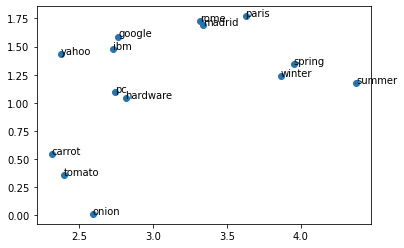

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Escribimos las palabras a representar
words = [ "madrid", "rome", "paris", "google","yahoo", "ibm", "hardware", "pc", "winter", "summer", "spring", "tomato", "carrot", "onion"]

# Recuperamos los índices de las palabras que nos interesan  
#indexes = [model.vocab[w].index for w in words]  #gensim 3
indexes = [model.key_to_index[w] for w in words]  #gensim 4


# Componemos una matriz con los vectores 2D de las palabras que nos interesan
vectors = np.vstack([wordspace2D[i,:] for i in indexes])  

# Representamos los vectores en un diagrama de dispersión
plt.scatter(vectors[:, 0], vectors[:, 1])

for label, x, y in zip(words, vectors[:, 0], vectors[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')


# Uso de word-embeddings para caracterizar textos cortos

Una forma sencilla de usar una word-embedding para caracterizar un texto es resumir los vectores de las palabras que aparecen en el texto en uno solo.

Para ello tenemos que hacer las siguientes tareas:
<ol>
  <li>Partir el texto de origen en palabras (tokens).</li>
  <li>Encontrar los vectores que se corresponden a las palabras del texto</li>
  <li>Combinarlos en un vector resumen normalmente el vector medio, pero también también caben otras alternativas, como usar dos vectores uno con los valores mínimos observados en el texto y otro con los máximos</li>
</ol>

Esta forma de trabajar asume que en los vectores de las palabras del texto hay una prevalencia semántica que debería quedar bien reflejada por el vector (o los vectores) resumen. Si esta hipótesis se cumple, los vectores resumen caracterizarán de manera efectiva textos de temas diferentes o con sentimientos diferentes y esta estrategia puede usarse con un algoritmo de clasificación de texto. En principio, esta hipótesis es ás probable si los textos son cortos y las palabras con poder diferenciador son relativamente abundantes en los textos.

### 1. Partiendo el texto de origen en palabras

Con el `CountVectorizer` troceamos cada texto en palabras y contamos el número de veces que aparecen. 

Sin embargo, puede darse el caso de que en el texto aparezcan palabras que no existen en la word-embedding. 

Para evitarnos tener que elminar dichas palabras, podemos pasarle al `CountVectorizer`  las palabras que queremos que reconozca  mediante el atributo `vocabulary`. 

En nuestro caso, queremos pasarle todas las palabras que existen en la word-embedding.

In [19]:
# En Gensim 3 se pueden obtener de la siguiente manera
# words = list(model.vocab.keys())

# En Gensim 4 se pueden obtener de la siguiente manera
# we_vocabulary = sorted(model.key_to_index.keys(), key=lambda word: model.get_vecattr(word, "count"), reverse=True)
we_vocabulary = list(model.key_to_index.keys())

print(we_vocabulary[0:10])


['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]


A continuación le pasamos a `CountVectorizer` nuestro corpus que contiene las siguientes frases:
- The meal was amazing 
- The meal was disgusting
- McDonalds hamburguers are disgusting
- I loved the burrito and the nachos
- I did not enjoy my pizza

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Ponemos nuestro corpus de palabras
corpus = [
    'The meal was amazing.',
    'The meal was disgusting.',
    'McDonalds hamburguers are disgusting.',
    'I loved the burrito and the nachos',
    'I did not enjoy my pizza',
]

# En vocabulary le pasamos el de la word-embedding, ponemos que pase los tokens a minusculas 
# Si ponemos binary a False coge frecuencias y si está en true presencia en modo binario
vectorizer = CountVectorizer(vocabulary = we_vocabulary, binary = False)

# Si usamos la lista de palabras vacías del inglés de sklearn quitamos artículos, preposiciones, etc 
#vectorizer = CountVectorizer(vocabulary = we_vocabulary, , stop_words='english', binary = False)


X = vectorizer.fit_transform(corpus)

# Mostramos las primeras palabras del diccionario para ver que son las mismas
#tokens = vectorizer.get_feature_names_out()  #gensim 3
tokens = vectorizer.get_feature_names()       #gendim 4
print(tokens[0:10])



# El array vectorizado tiene tantas filas como el corpus y 
# tantas columnas como palabras tiene la word-embedding
# Se trata de una matriz dispersa, pero vemos que los "the"
# están bien contabilizados y que se mantiene la ordenación del
# vocabulario dado
X.toarray()

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Lo que devuelve `vectorizer.fit_transform()` es una matriz dispersa ([scipy.sparse.csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)).

Necesitamos saber para cada documento qué términos (índices) están presentes (valor distinto de cero).

In [21]:
from scipy.sparse import find


def create_doc_embedding (doc_matrix_word_freq, keyedvectors):
    """
    create_doc_embedding creates a doc-embedding matrix where rows are the 
    documents and columns are the dimensions of the word-embedding. Each row r
    summarizes the vectors of the word-embeddings present in document r

    :param doc_matrix_word_freq: frequency matrix of the terms in each document
            It admits binary values, frequencies or weights.
            It admits the output of vectorizer.fit_transform
    :param keyedvectors: keyedvectors object from Gensim which has the 
            word-embedding information
    :return: returns the doc-embedding matrix that summarizes the 
             vector-embeddings of the words present in each document
    """ 

    
    num_docs, num_words= doc_matrix_word_freq.get_shape()

    # Creamos la matriz de documentos con tantas columnas como dimensiones tiene el we 
    doc_embed_matrix = np.zeros([num_docs,keyedvectors.vector_size])


    # Obtenemos los documentos
    docs, col, val = find(doc_matrix_word_freq)
    docs = np.unique(docs)

    # Para cada documento (esto se podrá hacer de forma más pythonica)
    for doc in docs:
      # Obtenemos las palabras presentes en el documento y su frecuencia
      row, words, frecs = find(doc_matrix_word_freq[doc,:])

      # Calculamos el vector medio para el documento
      # Para ello recuperamos los vectores del we presentes en el documento y 
      # los promediamos teniendo en cuenta su frecuencia
      count = 0
      for w,f in zip(words,frecs):
        doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:] + (keyedvectors[w] * f)
        count = count +1
      doc_embed_matrix[doc,:] = doc_embed_matrix[doc,:]/count
    
      
    return doc_embed_matrix

In [22]:
doc_embed_matrix = create_doc_embedding(X,model)
# contiene un vector "embedding" para cada documento
doc_embed_matrix

array([[ 2.52742760e-01,  1.17498477e-01, -6.07014991e-01,
        -1.39779998e-01,  9.07849990e-01, -3.10642486e-02,
        -5.59637500e-01, -8.57192257e-02,  1.28877449e-01,
         1.30470000e-01, -2.21549943e-02, -1.62250008e-02,
        -8.63600075e-02, -4.53500021e-02,  6.01715111e-01,
        -1.37237503e-01, -3.15624978e-02,  1.53020000e-01,
        -7.37421979e-01, -2.13115001e-01,  1.51132742e-01,
         1.67175010e-01,  1.91807505e-01, -2.34304998e-01,
         3.93804509e-01, -1.02431026e+00, -6.62635491e-01,
         1.42915249e-01,  4.22109999e-01, -2.61425041e-02,
         2.80820006e+00,  5.54425046e-02, -2.11760001e-01,
         2.10492510e-01,  2.33800535e-01,  1.96083731e-01,
         3.26595047e-01,  5.52070007e-01,  2.32772448e-02,
        -1.12093244e-01, -1.31565496e-01, -4.93745040e-02,
        -5.79327494e-01, -2.37917500e-02, -2.69367583e-02,
         1.00332499e-01, -4.80217860e-02, -2.46842245e-01,
         5.59974965e-02,  1.24782503e-01],
       [ 2.58



Una ventaja de usar word-embeddings para caracterizar textos en tareas de clasificación es que **el algoritmo de clasificación no necesitará haber visto determinadas palabras en entrenamiento para "reconocer" su significado** (siempre que éstas existan en la word-embedding).

De esta forma, supongamos la frase:
- I had a marvelous snack

Si miramos palabra por palabra, no  hay ninguna frase realmente similar en nuestro corpus. Quizás las últimas porque tienen la palabra 'I'.

Sin embargo, gracias a que el word-embedding captura la similitud de los términos 'snack' y 'meal', y la de los términos 'amazing' y 'marvelous', la distancia del coseno logra encontrar la frase con un sentido más similar.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

query = vectorizer.transform(['I had a marvelous snack'])

embed_query = create_doc_embedding(query,model)

simil = cosine_similarity(embed_query, doc_embed_matrix)

print(simil)

[[0.86611397 0.85057326 0.67385038 0.82627872 0.83924998]]


Podemos ver que gracias a las word-embeddings logra discernir correctamente y asociar como  frase más similar la primera en lugar de la segunda.

Sin embargo, podemos intuir también lo tosco de esta aproximación que resume un documento en base a sus palabras, y lo susceptible al ruido (palabras vacías o palabras sin sentimiento positivo/negativo) que es. 